# Final Project

Welcome to the final practical project for our course on [Data Science Bootcamp](https://open.hpi.de/courses/datascience2023). Throughout this project, you will go through the entire data science process, starting from data loading and cleaning, all the way to running a model and making predictions. This hands-on project will provide you with valuable experience and allow you to apply the concepts and techniques you've learned in the course. Get ready to dive into real-world data analysis and build your skills as a data scientist!


## Important Remarks:

 - The ultimate goal of this project is to conduct comprehensive data analysis and build 2 models using the provided datasets.
 - Code is not the only thing graded here. Well-written and understandable documentation of your code is to be expected
 - Clear reasoning behind your choices in every step of the notebook is important. Be it the choice of a data cleaning technique or selecting certain features in your analysis or the choice of your 2 models.

# Importing packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import metrics

# Load the dataset into data


In [3]:
data = pd.read_csv("titanic.csv")

# Dataset overview and statistical summary


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Survived     1000 non-null   int64  
 2   Pclass       1000 non-null   int64  
 3   Name         1000 non-null   object 
 4   Sex          1000 non-null   object 
 5   Age          823 non-null    float64
 6   SibSp        1000 non-null   int64  
 7   Parch        1000 non-null   int64  
 8   Ticket       1000 non-null   object 
 9   Fare         1000 non-null   float64
 10  Cabin        299 non-null    object 
 11  Embarked     998 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


We can see that Age, Cabin and Embarked are having some null entries

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1000.000000,1000.000000,1000.000000,823.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.404000,2.274000,30.177606,0.716000,0.571000,56.732249
std,288.819436,0.490943,0.840018,15.138305,1.312656,1.046926,98.014902
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,500.500000,0.000000,3.000000,29.000000,0.000000,0.000000,17.600000
75%,750.250000,1.000000,3.000000,39.500000,1.000000,1.000000,52.000000
max,1000.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It is to be noticed that Survived rate is changed from 0 to 1, in 50% to 75%

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data cleaning

These are the description of terms in this dataset

In [7]:
# VARIABLE DESCRIPTIONS - http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf

# Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# survival Survival (0 = No; 1 = Yes)
# name Name --
# sex Sex
# age Age
# sibsp Number of Siblings/Spouses Aboard
# parch Number of Parents/Children Aboard
# ticket Ticket Number --
# fare Passenger Fare (British pound) 
# cabin Cabin
# embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

For cleaning of data, such text values like name, ticket are not required for EDA

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          701
Embarked         2
dtype: int64

## Cabin Column
- Cabin data could be usefull to get knowledge of people who survived from which cabin.
- But 299 entries are filled out of 1000. - 30%
- Predicting the rest values may result in false classifications ahead.

In [9]:
data = data.drop(['Cabin'], axis=1)

Generating Median of Age for dealing with null entries

In [10]:
data['Age'].median()

29.0

In [11]:
data['Age'] = data['Age'].fillna(data['Age'].median())

Applying Mode function to Embarked to cover up null entries

In [12]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode().iloc[0])

For Visualization purpose creating a sex_ratio column that will display plots

In [13]:
data['Sex_Ratio'] = data['Sex'].replace(['male', 'female'], [0,1])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Survived     1000 non-null   int64  
 2   Pclass       1000 non-null   int64  
 3   Name         1000 non-null   object 
 4   Sex          1000 non-null   object 
 5   Age          1000 non-null   float64
 6   SibSp        1000 non-null   int64  
 7   Parch        1000 non-null   int64  
 8   Ticket       1000 non-null   object 
 9   Fare         1000 non-null   float64
 10  Embarked     1000 non-null   object 
 11  Sex_Ratio    1000 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 93.9+ KB


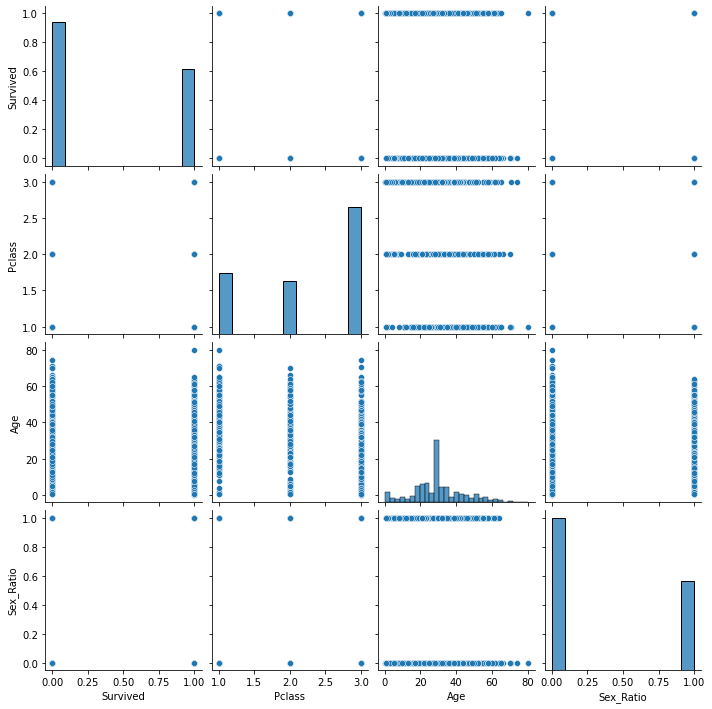

In [15]:
sns.pairplot(data[['Survived', 'Pclass', 'Age', 'Sex_Ratio']])

# EDA

In [16]:
# correlations
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Ratio
PassengerId,1.000000,0.060211,-0.091191,0.074481,0.187344,0.277960,0.389904,0.015860
Survived,0.060211,1.000000,-0.305096,-0.056226,0.025996,0.109678,0.192999,0.487347
Pclass,-0.091191,-0.305096,1.000000,-0.297758,0.003464,-0.041493,-0.320058,-0.120601
Age,0.074481,-0.056226,-0.297758,1.000000,-0.157325,-0.079506,0.066701,-0.077410
SibSp,0.187344,0.025996,0.003464,-0.157325,1.000000,0.439342,0.397940,0.144631
Parch,0.277960,0.109678,-0.041493,-0.079506,0.439342,1.000000,0.431476,0.213760
Fare,0.389904,0.192999,-0.320058,0.066701,0.397940,0.431476,1.000000,0.145768
Sex_Ratio,0.015860,0.487347,-0.120601,-0.077410,0.144631,0.213760,0.145768,1.000000


<AxesSubplot:>

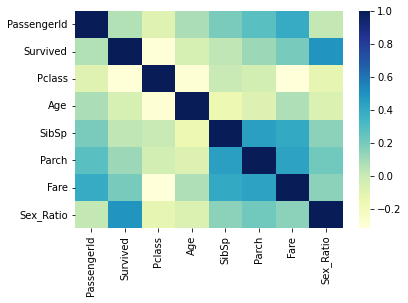

In [17]:
# heatmap
import matplotlib.pyplot as plt
sns.heatmap(data.corr(), cmap="YlGnBu")

In [18]:
# Getting the hold of data

In [19]:
data['PassengerId'].nunique()

1000

The total samples equals 1000, or 44.86%, of the 2,229 people that actually boarded the Titanic.

In [20]:
# getting survival percent of this dataset

survived_data = data[data['Survived'] == 1]
survived = survived_data.count().values[1]
survival_percent = (survived/1000) * 100
print('The percentage of survived people in this dataset are {:.2f} %'.format(survival_percent))

The percentage of survived people in this dataset are 40.40 %


In [21]:
data['Sex'].value_counts()

male      632
female    368
Name: Sex, dtype: int64

In [22]:
# Relation between Sex and survival rate
data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.717391
1,male,0.221519


Survival Rate based on Sex
- Female: 71.73%
- Male: 22.15%

In [23]:
#Calculating the total number of passengers for each Pclass and whether they survived
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values('Survived', ascending = False)

,Pclass,Survived
0,1,0.612648
1,2,0.495455
2,3,0.265655


Survival Rate based on Pclass
- 1: 61.26%
- 2: 49.54%
- 3: 26.56%

In [24]:
# getting survival rate based on Pclass and sex
data[['Survived', 'Sex', 'Pclass']].groupby(['Pclass', 'Sex']).mean()

Survived
Pclass Sex             
1      female  0.901786
       male    0.382979
2      female  0.869565
       male    0.226562
3      female  0.506098
       male    0.157025

In [25]:
# actual values
data[['Survived', 'Sex', 'Pclass']].groupby(['Pclass', 'Sex']).count()

Survived
Pclass Sex             
1      female       112
       male         141
2      female        92
       male         128
3      female       164
       male         363

In [26]:
# correlation values between pclass, survival, age

print('Age w/t Pclass:',data['Age'].corr(data['Pclass']))
print('Age w/t Survival:',data['Age'].corr(data['Survived']))
print('Survival w/t Pclass:',data['Survived'].corr(data['Pclass']))

Age w/t Pclass: -0.2977579877164832
Age w/t Survival: -0.05622583118618498
Survival w/t Pclass: -0.30509598788140097


<Figure size 1080x432 with 0 Axes>

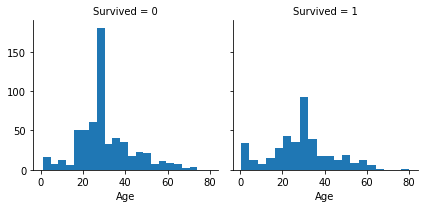

In [27]:
# creating a sns facegrid to display the survived vs age hist

plt.figure(figsize = (15,6))
g = sns.FacetGrid(data, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)

# Data Processing and normalization

Applying Label Encoding to the categorical data -- Sex: ['Male','Female'] and Embarked: ['C','Q','S']

In [28]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [29]:
X = data[['Pclass', 'Sex', 'Age','SibSp' ,'Parch' ,'Fare','Embarked']].values
y = data['Survived'].values

Test size can be different in scenarios - but here 0.25 is approving best predictions

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Scaling the values, the scaling is used for making data points generalized so that the distance between them will be lower, this will help the machine.

In [31]:
scale = StandardScaler()

In [32]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# Creating ML model 1

Using Logistic Regression

In [33]:
lr_model = LogisticRegression(solver='liblinear', random_state=20)

In [34]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=20, solver='liblinear')

## Prediction on Test data

In [35]:
y_pred_lr = lr_model.predict(X_test_scaled)

## Model 1 Performance

In [36]:
accuracy_score = round(lr_model.score(X_train_scaled, y_train) * 100, 2)
print("Logistic Regression Model Accuracy - Training:", accuracy_score, "%")

Logistic Regression Model Accuracy - Training: 78.13 %


In [37]:
accuracy_score = round(lr_model.score(X_test_scaled, y_test) * 100, 2)
print("Logistic Regression Model Accuracy - Testing:", accuracy_score, "%")

Logistic Regression Model Accuracy - Testing: 76.4 %


# Creating ML model 2

Using Decision Tree Classifier, with max_depth = 7

In [38]:
dtc_model = DecisionTreeClassifier(max_depth=7)

In [39]:
dtc_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=7)

## Prediction on Test data

In [40]:
y_pred_2 = dtc_model.predict(X_test_scaled)

## ## Model 2 Performance

In [41]:
accuracy_score = round(dtc_model.score(X_train_scaled, y_train) * 100, 2)
print("Decision Tree Model Accuracy - Training:", accuracy_score, "%")

Decision Tree Model Accuracy - Training: 89.07 %


In [42]:
accuracy_score = round(dtc_model.score(X_test_scaled, y_test) * 100, 2)
print("Decision Tree Model Accuracy - Testing:", accuracy_score, "%")

Decision Tree Model Accuracy - Testing: 76.0 %


# Report and insight from your analysis

## Model and Dataset Analysis
- Logistic Regression and Decision Tree Classifier fits well with this data.
- I could get more insight of survival rate based on cabin data, but because of its huge amount of null values occurence, predicting them and moving ahead with it, will finally cause false predictions

## Dataset overview and statistical summary Analysis
- The total samples equals 1000, or 44.86%, of the 2,229 people that actually were present in the Titanic.
- Survived is a categorical feature with 0 or 1 values.
- Similar goes to Sex column with Male and Female.
- According to this dataset 40.40% survived while actual survival rate was 31%.
- Highest Fare was around $512.32.

## EDA Analysis

- Male: 632 and Female: 368 are present in this dataset sample of 1000.
- Survival Rate based on Sex - Female: 71.73% and Male: 22.15%
- Survival Rate based on Pclass 1: 61.26%, Pclass 2: 49.54%, Pclass 3: 26.56%
- The actual values of Survival based on Pclass and Sex are:
- [Pclass, Sex, Number] = [{1, F, 112}, {1, M, 141}, {2, F, 92}, {2, M, 128}, {3, F, 164}, {3, M, 363}]

## Data Processing Analysis

- Logistic Regression Accuracy: [Training: 78.13%, Testing: 76.4%]
- Decision Tree Accuracy: [Training: 89.7%, Testing: 76.0%]